In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
index1 = ["159920", "159928", "159949", "159995"]
index2 = ["510500","512400","512880","515700","510880","512480","513050","515790","510900",
          "512660","513090","518880","512000","512690","515030","588000", "510050","512010","512760",
          "515050","510300","512170","512800","515220"]
outputdir = "output/"
path1 = "financial/"
k = 30 #window_size
threshold = 0.0005  #threshold
threshold2 = 0.0002
ignoreIndex = 200 #Ignore Index
#horizon

files1 = os.listdir(path1)
num1 = len(files1)
files1.sort()


In [14]:
def checkname(id):
    if id in index1:
        filename = id + ".SZ.Compressed.npz"
    elif id in index2:
        filename = id + ".SH.Compressed.npz"
    return filename

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def check(target, ignoreIndex=100):
    newIndex = np.all(target!=0, axis=1)
    newIndex[ignoreIndex:-ignoreIndex] = True
    output = target[newIndex]
    output = numba_loops_fill(output)
    return output

def numba_loops_fill(arr):
    '''Numba decorator solution provided by shx2.'''
    out = arr.copy()
    for row_idx in range(out.shape[0]):
        for col_idx in range(1, out.shape[1]):
            if out[row_idx, col_idx] == 0:
                out[row_idx, col_idx] = out[row_idx, col_idx - 1]
    return out

def preprocess(id):
    dat = None
    # id = index1[0]
    for i in range(num1):
        path2 = path1 + files1[i]
        files2 = os.listdir(path2)
        for elem in files2:
            label = list()
            if id in elem:
                print(path2 + "/" + checkname(id))
                ddict = np.load(path2 + "/" + elem)
                askPrice, askVolume, bidPrice, bidVolume = \
                    ddict["askPrice"][:,:5], ddict['askVolume'][:,:5], ddict['bidPrice'][:,:5], ddict['bidVolume'][:,:5]
                # print(askPrice.shape, askVolume.shape, bidPrice.shape, bidVolume.shape)
                date = ddict["timestamp"]
                askPriceNew = check(askPrice)
                # askPriceNew = np.delete(askPrice, np.where((askPrice == 0))[0], axis=0)
                askVolumeNew = check(askVolume)
                bidPriceNew = check(bidPrice)
                bidVolumeNew =  check(bidVolume)

                # AskPriceNew = askPrice[100:-100]
                # AskVolumeNew = askVolume[100:-100]
                # BidPriceNew = bidPrice[100:-100]
                # BidVolumeNew = bidVolume[100:-100]

                pa = askPriceNew.min(axis=1)
                pb = bidPriceNew.max(axis=1)
                pts = (pa + pb) / 2

                pm = moving_average(pts, k)
                for i in range(k-1):
                    pm = np.append(pm, pm[-1])
                perc = pm / pts - 1
                # plt.plot(perc)
                # plt.show()
                for x in perc:
                    if x > threshold:
                        temp = 4
                    elif x <= threshold and x > threshold2:
                        temp = 3
                    elif x <= threshold2 and x > -threshold2:
                        temp = 2
                    elif x <= -threshold2 and x > -threshold:
                        temp = 1
                    elif x <= -threshold:
                        temp = 0
                    label.append(temp)
                    
                # label = [1 if x > threshold else -1 if x < -threshold else 0 for x in perc]
                label = np.array(label)[..., np.newaxis]

                temp = askPriceNew
                temp = np.append(temp, askVolumeNew, axis=1)
                temp = np.append(temp, perc, axis=1)
                temp = np.append(temp, bidPriceNew, axis=1)
                temp = np.append(temp, bidVolumeNew, axis=1)
                temp = temp / 10000.0
                if 0 in temp:
                    print("No!!!")

                temp = np.append(temp, label, axis=1)
                print(temp.shape)
                dat = temp if dat is None else np.append(dat, temp, axis=0)
                print(dat.shape)

    np.savez(outputdir + str(id) + "_" + str(k) +".npz", dat)
    print(id, dat.shape)
    print("*" * 100)


In [15]:
temp = preprocess("159920")

financial/20210104/159920.SZ.Compressed.npz


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

/home/qingyi/GPU31/DeepLOB


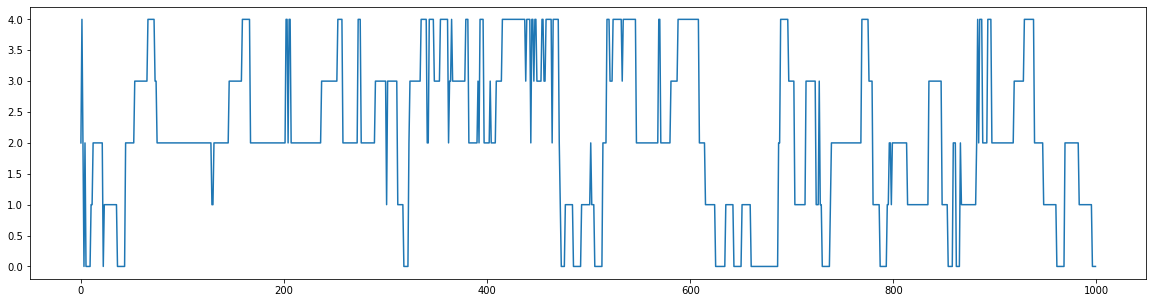

In [6]:
import os
import numpy as np
print(os.getcwd())
tmp = np.load("./output/159920_30.npz")['arr_0']
# print(tmp)
data = tmp[:1000,-1]
plt.figure(figsize=(20, 5))
plt.plot(data)
plt.show()


In [8]:
tmp[:1000,-1]

array([2., 4., 2., 0., 2., 0., 0., 0., 0., 0., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 4., 4., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

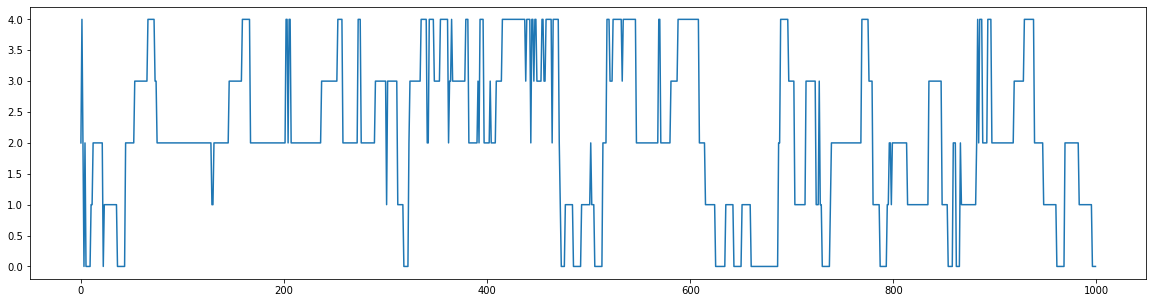

In [10]:
data = tmp[:1000,-1]
plt.figure(figsize=(20, 5))
plt.plot(data)

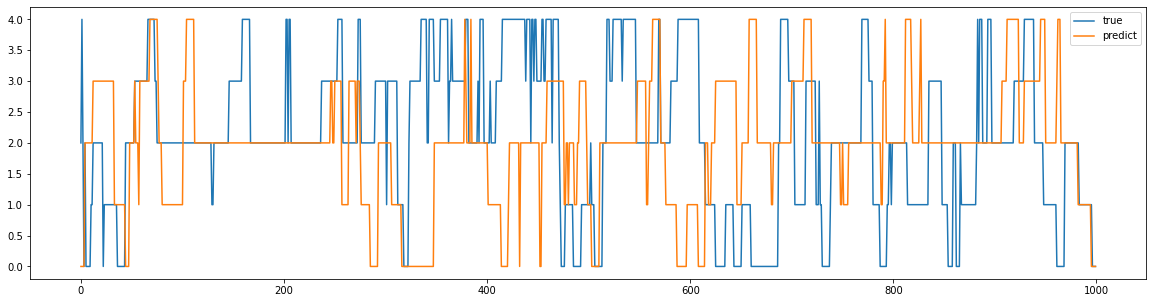

In [12]:
data1 = tmp[:1000,-1]
data2 = tmp[1000:2000,-1]
plt.figure(figsize=(20, 5))
plt.plot(data1, label="true")
plt.plot(data2, label="predict")
plt.legend()
plt.show()
# 一共收益的值